<a href="https://colab.research.google.com/github/akashpatil108/Deep-Learning/blob/main/LSTM_RNN_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM RNN practice
implementation of an LSTM-based RNN model for a binary classification task

akash patil
aakashgolu1008@gmail.com

In [ ]:
from google.colab import files
files.upload()


In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
!kaggle competitions list


ref                                                                                           deadline             category            reward  teamCount  userHasEntered  
--------------------------------------------------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
https://www.kaggle.com/competitions/asl-fingerspelling                                        2023-08-24 23:59:00  Research          $200,000        875           False  
https://www.kaggle.com/competitions/icr-identify-age-related-conditions                       2023-08-10 23:59:00  Featured           $60,000       6146           False  
https://www.kaggle.com/competitions/commonlit-evaluate-student-summaries                      2023-10-11 23:59:00  Featured           $60,000        369           False  
https://www.kaggle.com/competitions/bengaliai-speech                                          2023-10-17 23:59:00  Research           $53,000    

In [7]:
!kaggle competitions download -c fake-news

 97% 45.0M/46.5M [00:03<00:00, 20.6MB/s]
100% 46.5M/46.5M [00:03<00:00, 13.5MB/s]


In [109]:
import pandas as pd
import zipfile
import os

# Specify the path to the zip file
zip_file_path = '/content/fake-news.zip'

# Extract the contents of the zip file to a temporary directory
destination_directory = '/content/destination_folder/'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_directory)

# List the files in the destination folder after extraction
extracted_files = os.listdir(destination_directory)
print(extracted_files)


['test.csv', 'train.csv', 'submit.csv']


# Dataset Description
train.csv: A full training dataset with the following attributes:

id: unique id for a news article <br>
title: the title of a news article<br>
author: author of the news article<br>
text: the text of the article; could be incomplete<br>
label: a label that marks the article as potentially unreliable<br>
1: unreliable<br>
0: reliable<br>
test.csv: A testing training dataset with all the same attributes at train.csv without the label.

submit.csv: A sample submission that you can

In [12]:
import pandas as pd
train_fn=pd.read_csv('/content/destination_folder/train.csv')

In [13]:
train_fn.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [14]:
train_fn.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [15]:
train_fn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [17]:
train_fn.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


<Axes: >

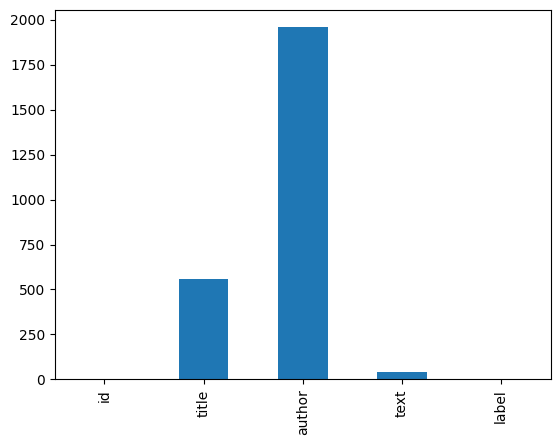

In [19]:
train_fn.isnull().sum().plot(kind='bar')

In [29]:
train_fn.isnull().mean()*100

id        0.000000
title     2.682692
author    9.408654
text      0.187500
label     0.000000
dtype: float64

In [28]:
# to check the null values
train_fn[train_fn.isnull().any(axis=1)]

,id,title,author,text,label
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
20,20,News: Hope For The GOP: A Nude Paul Ryan Has J...,NaN,Email \nSince Donald Trump entered the electio...,1
23,23,Massachusetts Cop’s Wife Busted for Pinning Fa...,NaN,Massachusetts Cop’s Wife Busted for Pinning Fa...,1
31,31,Israel is Becoming Pivotal to China’s Mid-East...,NaN,Country: Israel While China is silently playin...,1
...,...,...,...,...,...
20745,20745,Thomas Frank Explores Whether Hillary Clinton ...,NaN,Thomas Frank Explores Whether Hillary Clinton ...,1
20768,20768,Osama bin Laden’s older brother rents out luxu...,NaN,Osama bin Laden’s older brother rents out luxu...,1
20771,20771,NaN,Letsbereal,DYN's Statement on Last Week's Botnet Attack h...,1
20772,20772,NaN,beersession,Kinda reminds me of when Carter gave away the ...,1


# ** fill null values **
in a DataFrame with object (string) data type.

1. Fill with a constant value:
   You can fill null values with a specific constant string using the `fillna()` method. For example, to replace null values with the string "Unknown":

   ```python
   train_fn['column_name'] = train_fn['column_name'].fillna('Unknown')
   ```

2. Fill with the most frequent value:
   You can fill null values with the most frequent value in the column using the `fillna()` method with the `value` parameter set to the mode of the column:

   ```python
   most_frequent_value = train_fn['column_name'].mode()[0]
   train_fn['column_name'] = train_fn['column_name'].fillna(most_frequent_value)
   ```

3. Forward-fill or backward-fill (ffill/bfill):
   You can fill null values using the previous or next non-null value in the column using the `fillna()` method with `method='ffill'` or `method='bfill'`. This method is useful when data has a temporal or sequential order.

   ```python
   train_fn['column_name'] = train_fn['column_name'].fillna(method='ffill')
   ```

4. Interpolation:
   You can use interpolation techniques to fill null values based on the existing data. For example, you can use linear interpolation using the `interpolate()` method:

   ```python
   train_fn['column_name'] = train_fn['column_name'].interpolate(method='linear')
   ```

5. Group-wise fill:
   If you have categorical data, you can use group-wise fill with the `fillna()` method and the `transform()` function to fill null values with the group's mode:

   ```python
   train_fn['column_name'] = train_fn.groupby('group_column')['column_name'].transform(lambda x: x.fillna(x.mode()[0]))
   ```

In [30]:
# here is all null values are in title, author and text we cant fill so we drop the null values
train_fn.dropna()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [31]:
# get the independent features
X=train_fn.drop('label',axis=1)
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [33]:
# get the dependent features
y=train_fn.label
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

In [34]:
X.shape

(20800, 4)

In [35]:
y.shape

(20800,)

In [36]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [42]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense


In [43]:
## vocabulary size
voc_size=5000

# onehot representation

In [44]:
massages=X.copy()

In [45]:
massages['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [47]:
massages.head(10)

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi..."
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi..."
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...


In [50]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [75]:
## dataset preprocessing
from nltk.stem.porter import PorterStemmer  # stemming purpose
ps=PorterStemmer()
corpus=[]
for i in range(0,len(massages)):
  # if isinstance(massages['title'][i], str):

  review=re.sub('[^a-zA-Z]',' ',str(massages['title'][i]))
  review=review.lower()
  review=review.split()

  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)

In [76]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'life life luxuri elton john favorit shark pictur stare long transcontinent flight',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'excerpt draft script donald trump q ampa black church pastor new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find hom

In [77]:
import numpy as np
np.array(corpus).shape

(20800,)

In [78]:
onehot_repr=[one_hot(word,voc_size) for word in corpus]
onehot_repr

[[3814, 186, 1808, 370, 3188, 1072, 1365, 662, 3243, 3655],
 [318, 522, 845, 1807, 4906, 3978, 3970],
 [1757, 100, 2984, 516],
 [3112, 478, 1052, 4508, 4199, 964],
 [496, 4906, 2735, 1598, 2020, 4883, 4906, 379, 929, 327],
 [3181,
  204,
  3853,
  296,
  4325,
  4736,
  1120,
  4627,
  3723,
  4551,
  138,
  2026,
  2099,
  886,
  3970],
 [2654, 2654, 2797, 3107, 2416, 3706, 4738, 2323, 1052, 4255, 798, 800],
 [4396, 3437, 2784, 1792, 1774, 2642, 4912, 2251, 4091, 926, 1874],
 [3895, 2909, 1548, 530, 4736, 3589, 2118, 4134, 1806, 3454, 4091, 926, 1874],
 [3925, 1343, 1908, 4799, 1279, 2217, 4736, 2482, 4091, 926, 1874],
 [3077, 1796, 2001, 4302, 3273, 4503, 2053, 4760, 4736, 2977],
 [821, 2307, 4236, 2633, 1338, 4928, 3357, 2658],
 [276, 3266, 877, 2911, 1202, 1822, 3321, 1753, 1215, 1529, 1251],
 [4508, 2745, 3188, 4503, 4736, 1279],
 [1200, 1264, 2657, 1442, 4565, 4969, 3187, 2544, 1072],
 [3755, 869, 4632, 185, 3278, 1034, 4930, 4091, 926, 1874],
 [1437, 2495, 3235, 1554, 2825, 4091

In [79]:
corpus[10]

'obama organ action partner soro link indivis disrupt trump agenda'

In [80]:
onehot_repr[10]

[3077, 1796, 2001, 4302, 3273, 4503, 2053, 4760, 4736, 2977]

# Embedding Representatoin

In [81]:
sent_length=20
embedding_docs=pad_sequences(onehot_repr,padding='post',maxlen=sent_length)
print(embedding_docs)

[[3814  186 1808 ...    0    0    0]
 [ 318  522  845 ...    0    0    0]
 [1757  100 2984 ...    0    0    0]
 ...
 [4451 1698 2084 ...    0    0    0]
 [2079 1279 2007 ...    0    0    0]
 [3438 4031 3961 ...    0    0    0]]


In [82]:
embedding_docs[25]

array([ 434, 4552, 3194,  292, 3698, 3145, 2841,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [83]:
embedding_vector_features=40  # can we use the CBOW or tf-idf
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            200000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               56400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [84]:
len(embedding_docs),y.shape

(20800, (20800,))

In [86]:
X_final=np.array(embedding_docs)
y_final=np.array(y)
X_final

array([[3814,  186, 1808, ...,    0,    0,    0],
       [ 318,  522,  845, ...,    0,    0,    0],
       [1757,  100, 2984, ...,    0,    0,    0],
       ...,
       [4451, 1698, 2084, ...,    0,    0,    0],
       [2079, 1279, 2007, ...,    0,    0,    0],
       [3438, 4031, 3961, ...,    0,    0,    0]], dtype=int32)

In [88]:
X_final.shape,y_final.shape

((20800, 20), (20800,))

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

# Model Training

In [89]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
218/218 [==============================] - 24s 75ms/step - loss: 0.2898 - accuracy: 0.8606 - val_loss: 0.1970 - val_accuracy: 0.9237
Epoch 2/10
218/218 [==============================] - 6s 26ms/step - loss: 0.1266 - accuracy: 0.9524 - val_loss: 0.2078 - val_accuracy: 0.9218
Epoch 3/10
218/218 [==============================] - 3s 13ms/step - loss: 0.0968 - accuracy: 0.9657 - val_loss: 0.2026 - val_accuracy: 0.9272
Epoch 4/10
218/218 [==============================] - 2s 11ms/step - loss: 0.0773 - accuracy: 0.9745 - val_loss: 0.2590 - val_accuracy: 0.9191
Epoch 5/10
218/218 [==============================] - 2s 11ms/step - loss: 0.0616 - accuracy: 0.9794 - val_loss: 0.2691 - val_accuracy: 0.9216
Epoch 6/10
218/218 [==============================] - 3s 14ms/step - loss: 0.0463 - accuracy: 0.9844 - val_loss: 0.3796 - val_accuracy: 0.9207
Epoch 7/10
218/218 [==============================] - 2s 10ms/step - loss: 0.0383 - accuracy: 0.9874 - val_loss: 0.3463 - val_accuracy: 0.914

In [ ]:
y_pred=model.predict(X_test)

215/215 [==============================] - 1s 2ms/step


In [ ]:
y_pred=np.where(y_pred > 0.5, 1,0) ##AUC ROC Curve

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[3181,  268],
       [ 313, 3102]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9153554778554779

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      3449
           1       0.92      0.91      0.91      3415

    accuracy                           0.92      6864
   macro avg       0.92      0.92      0.92      6864
weighted avg       0.92      0.92      0.92      6864



# Adding Dropout
to improve the accuracy

In [101]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [102]:
### Finally Training after adding Dropout
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
218/218 [==============================] - 16s 60ms/step - loss: 0.2866 - accuracy: 0.8686 - val_loss: 0.1985 - val_accuracy: 0.9245
Epoch 2/10
218/218 [==============================] - 5s 22ms/step - loss: 0.1384 - accuracy: 0.9472 - val_loss: 0.1891 - val_accuracy: 0.9223
Epoch 3/10
218/218 [==============================] - 2s 11ms/step - loss: 0.1080 - accuracy: 0.9605 - val_loss: 0.2144 - val_accuracy: 0.9187
Epoch 4/10
218/218 [==============================] - 2s 11ms/step - loss: 0.0827 - accuracy: 0.9709 - val_loss: 0.2004 - val_accuracy: 0.9237
Epoch 5/10
218/218 [==============================] - 2s 11ms/step - loss: 0.0655 - accuracy: 0.9773 - val_loss: 0.2584 - val_accuracy: 0.9210
Epoch 6/10
218/218 [==============================] - 2s 9ms/step - loss: 0.0557 - accuracy: 0.9796 - val_loss: 0.2505 - val_accuracy: 0.9218
Epoch 7/10
218/218 [==============================] - 2s 9ms/step - loss: 0.0437 - accuracy: 0.9849 - val_loss: 0.3151 - val_accuracy: 0.9197


# Performance Metrics And Accuracy

In [103]:
y_pred=model.predict(X_test)

215/215 [==============================] - 1s 3ms/step


In [104]:
y_pred=np.where(y_pred > 0.5, 1,0) ##AUC ROC Curve

In [105]:
from sklearn.metrics import confusion_matrix

In [106]:
confusion_matrix(y_test,y_pred)

array([[3097,  352],
       [ 173, 3242]])

In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.923513986013986

In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3449
           1       0.90      0.95      0.93      3415

    accuracy                           0.92      6864
   macro avg       0.92      0.92      0.92      6864
weighted avg       0.92      0.92      0.92      6864

